## CNN

In [241]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import csv
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

from keras.layers import Conv1D, Conv2D, MaxPooling2D 
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np



from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np




In [242]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low
#To Sequence
import numpy as np

def to_sequences(seq_size,data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)]
        #print(window)
        after_window = close[i+seq_size]
        #print(after_window)
        #after_window = after_window[4]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [243]:
#path = "./dataset/"
preprocess = True

filename_read = os.path.join("CSC215_P2_Stock_Price.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
df.drop(['Date','Adj_Close'], axis = 1, inplace = True)

In [244]:
df_close = df['Close']

In [245]:
encode_numeric_zscore(df, 'Open', mean=None, sd=None)
encode_numeric_zscore(df, 'High', mean=None, sd=None)
encode_numeric_zscore(df, 'Low', mean=None, sd=None)
#encode_numeric_zscore(df, 'Close', mean=None, sd=None)
encode_numeric_zscore(df, 'Volume', mean=None, sd=None)

In [246]:
percent70 = int(len(df)* 0.70)
percent30 = len(df) - percent70

train = df[0:percent70]
test = df[percent70:len(df)]
train_close = df_close[0:percent70].values
test_close = df_close[percent70:len(df_close)].values

print("Shape of X_Train: ", train.shape)
print("Shape of Y_Train: ", train_close.shape)
print("Shape of X_Test: ", test.shape)
print("Shape of Y_Test: ", test_close.shape)

Shape of X_Train:  (3074, 5)
Shape of Y_Train:  (3074,)
Shape of X_Test:  (1318, 5)
Shape of Y_Test:  (1318,)


In [247]:
def to_sequences(seq_size,data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)].values
        #print(window)
        after_window = close[i+seq_size]
        #print(after_window)
        #after_window = after_window[4]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [248]:
SEQUENCE_SIZE = 7

x_train_cnn,y_train_cnn = to_sequences(SEQUENCE_SIZE,train,train_close)
x_test_cnn,y_test_cnn = to_sequences(SEQUENCE_SIZE,test,test_close)

print("Shape of x_train: {}".format(x_train_cnn.shape))
print("Shape of x_test: {}".format(x_test_cnn.shape))
print("Shape of y_train: {}".format(y_train_cnn.shape))
print("Shape of y_test: {}".format(y_test_cnn.shape))

Shape of x_train: (3066, 7, 1, 5)
Shape of x_test: (1310, 7, 1, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


In [249]:
x_train_cnn = np.reshape(x_train_cnn,(x_train_cnn.shape[0],x_train_cnn.shape[1],x_train_cnn.shape[3]))
x_test_cnn = np.reshape(x_test_cnn,(x_test_cnn.shape[0],x_test_cnn.shape[1],x_test_cnn.shape[3]))

print("Shape of x_train: {}".format(x_train_cnn.shape))
print("Shape of x_test: {}".format(x_test_cnn.shape))
print("Shape of y_train: {}".format(y_train_cnn.shape))
print("Shape of y_test: {}".format(y_test_cnn.shape))

Shape of x_train: (3066, 7, 5)
Shape of x_test: (1310, 7, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


In [250]:
data_rows, data_cols, data_channels = 1,7,5
x_train_cnn = x_train_cnn.reshape(x_train_cnn.shape[0], data_rows, data_cols, data_channels)
x_test_cnn = x_test_cnn.reshape(x_test_cnn.shape[0], data_rows, data_cols,data_channels)

print("4D Shape")
print("Shape of X_Train: ", x_train_cnn.shape)
print("Shape of Y_Train: ", y_train_cnn.shape)
print("Shape of X_Test: ", x_test_cnn.shape)
print("Shape of Y_Test: ", y_test_cnn.shape)
input_shape = (data_rows, data_cols, data_channels)

4D Shape
Shape of X_Train:  (3066, 1, 7, 5)
Shape of Y_Train:  (3066,)
Shape of X_Test:  (1310, 1, 7, 5)
Shape of Y_Test:  (1310,)


## CNN with 2 Conv2d layers, Maxpooling, Dropout, early stopping, Checkpointing and 1 dense layer

In [251]:
checkpointer_cnn = ModelCheckpoint(filepath="./best_weights_stock_cnn_es.hdf5", verbose=1, save_best_only=True)


In [252]:
for i in range(2):
    print(i)
    
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, kernel_size=(1, 4), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
    model_cnn.add(Conv2D(64, (1, 1), activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(10, activation='relu'))
    model_cnn.add(Dense(1))
    model_cnn.compile(loss='mean_squared_error', optimizer='sgd')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_cnn.fit(x_train_cnn, y_train_cnn, 
            batch_size=128, 
            callbacks=[monitor, checkpointer_cnn], 
            epochs=10, 
            verbose=2, 
            validation_data=(x_test_cnn, y_test_cnn))

print('Loading the best model') 
print()
model_cnn.load_weights('./best_weights_stock_cnn_es.hdf5')
model_cnn.summary()

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 4s - loss: 80548400360.0856 - val_loss: 229885316.3969

Epoch 00001: val_loss improved from inf to 229885316.39695, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 2/10
 - 0s - loss: 149240255.1181 - val_loss: 87546755.3832

Epoch 00002: val_loss improved from 229885316.39695 to 87546755.38321, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 3/10
 - 0s - loss: 56589500.0783 - val_loss: 33429710.2901

Epoch 00003: val_loss improved from 87546755.38321 to 33429710.29008, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 4/10
 - 0s - loss: 21457825.4534 - val_loss: 12820566.2580

Epoch 00004: val_loss improved from 33429710.29008 to 12820566.25802, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 5/10
 - 0s - loss: 8136520.1233 - val_loss: 4951292.7275

Epoch 00005: val_loss improved from 12820566.25802 to 4951292.72748, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 6/10
 - 0s - loss: 3085343

C:\Users\yesha\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\yesha\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:709: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):



Epoch 00002: val_loss did not improve from 60746.74897
Epoch 3/10
 - 0s - loss: nan - val_loss: nan

Epoch 00003: val_loss did not improve from 60746.74897
Epoch 4/10
 - 0s - loss: nan - val_loss: nan

Epoch 00004: val_loss did not improve from 60746.74897
Epoch 5/10
 - 0s - loss: nan - val_loss: nan

Epoch 00005: val_loss did not improve from 60746.74897
Epoch 00005: early stopping
Loading the best model

Model: "sequential_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_323 (Conv2D)          (None, 1, 4, 32)          672       
_________________________________________________________________
conv2d_324 (Conv2D)          (None, 1, 4, 64)          2112      
_________________________________________________________________
flatten_144 (Flatten)        (None, 256)               0         
_________________________________________________________________
dense_287 (Dense)            (None, 1

In [253]:
pred_cnn = model_cnn.predict(x_test_cnn)
pred_cnn.flatten()

array([-177.52663, -177.52663, -177.52663, ..., -177.52663, -177.52663,
       -177.52663], dtype=float32)

Score (RMSE): 246.46855670417114


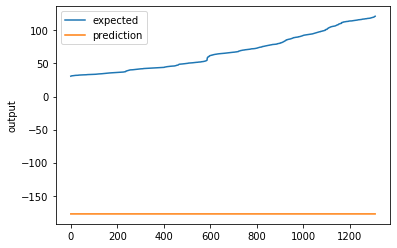

In [254]:
score_cnn= np.sqrt(mean_squared_error(pred_cnn,y_test_cnn))
print("Score (RMSE): {}".format(score_cnn))
chart_regression(pred_cnn.flatten(),y_test_cnn)

## CNN with 3 Conv2d layers, Maxpooling, Dropout, early stopping, Checkpointing and 1 dense layer

In [255]:
checkpointer_cnn = ModelCheckpoint(filepath="./best_weights_stock_cnn.hdf5", verbose=1, save_best_only=True)


In [256]:
for i in range(3):
    print(i)
    
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, kernel_size=(1, 5), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
    model_cnn.add(Conv2D(64, (1, 1), activation='relu'))
    model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=None))
    model_cnn.add(Dropout(0.25))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(10, activation='relu'))
    model_cnn.add(Dense(1))
    model_cnn.compile(loss='mean_squared_error', optimizer='sgd')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_cnn.fit(x_train_cnn, y_train_cnn, 
            batch_size=128, 
            callbacks=[monitor, checkpointer_cnn], 
            epochs=10, 
            verbose=2, 
            validation_data=(x_test_cnn, y_test_cnn))

print('Training finished...Loading the best model') 
print()

model_cnn.load_weights('./best_weights_stock_cnn.hdf5')
model_cnn.summary()

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 4s - loss: nan - val_loss: nan

Epoch 00001: val_loss did not improve from inf
Epoch 2/10


C:\Users\yesha\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\yesha\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:709: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


 - 0s - loss: nan - val_loss: nan

Epoch 00002: val_loss did not improve from inf
Epoch 3/10
 - 0s - loss: nan - val_loss: nan

Epoch 00003: val_loss did not improve from inf
Epoch 4/10
 - 0s - loss: nan - val_loss: nan

Epoch 00004: val_loss did not improve from inf
Epoch 5/10
 - 0s - loss: nan - val_loss: nan

Epoch 00005: val_loss did not improve from inf
Epoch 00005: early stopping
1
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 4s - loss: 36300.4934 - val_loss: 6252.9857

Epoch 00001: val_loss improved from inf to 6252.98570, saving model to ./best_weights_stock_cnn.hdf5
Epoch 2/10
 - 0s - loss: 422.9090 - val_loss: 5097.6666

Epoch 00002: val_loss improved from 6252.98570 to 5097.66658, saving model to ./best_weights_stock_cnn.hdf5
Epoch 3/10
 - 0s - loss: 235.1833 - val_loss: 4454.2193

Epoch 00003: val_loss improved from 5097.66658 to 4454.21925, saving model to ./best_weights_stock_cnn.hdf5
Epoch 4/10
 - 0s - loss: 164.0976 - val_loss: 4083.2418

Epoch 00004: v

C:\Users\yesha\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\yesha\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:709: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


 - 0s - loss: nan - val_loss: nan

Epoch 00002: val_loss did not improve from 3559.47059
Epoch 3/10
 - 0s - loss: nan - val_loss: nan

Epoch 00003: val_loss did not improve from 3559.47059
Epoch 4/10
 - 0s - loss: nan - val_loss: nan

Epoch 00004: val_loss did not improve from 3559.47059
Epoch 5/10
 - 0s - loss: nan - val_loss: nan

Epoch 00005: val_loss did not improve from 3559.47059
Epoch 00005: early stopping
Training finished...Loading the best model

Model: "sequential_148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_329 (Conv2D)          (None, 1, 3, 32)          832       
_________________________________________________________________
conv2d_330 (Conv2D)          (None, 1, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 1, 3, 64)          0         
_____________________________________________________

In [257]:
pred_cnn_2 = model_cnn.predict(x_test_cnn)

Score (RMSE): 59.66129907984722


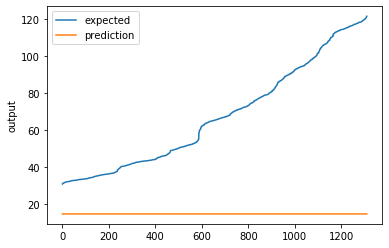

In [258]:
score_cnn_2= np.sqrt(mean_squared_error(pred_cnn_2,y_test_cnn))
print("Score (RMSE): {}".format(score_cnn_2))
chart_regression(pred_cnn_2.flatten(),y_test_cnn)